1. Dùng file '50_Startups.csv'
2. Lưu ý : xóa dữ liệu cột State (xóa trong code, không được xóa trong file csv)

<function matplotlib.pyplot.show(close=None, block=None)>

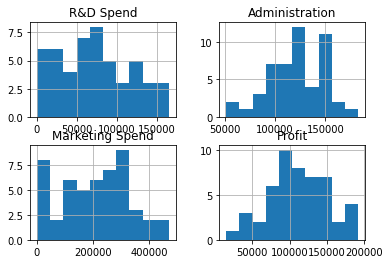

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model #thư viện dùng cho machine learning - mô hình tuyến tính

url = '50_Startups.csv'
data = pd.read_csv(url)
data.hist()  #vẽ phân bố dữ liệu Histogram
plt.show

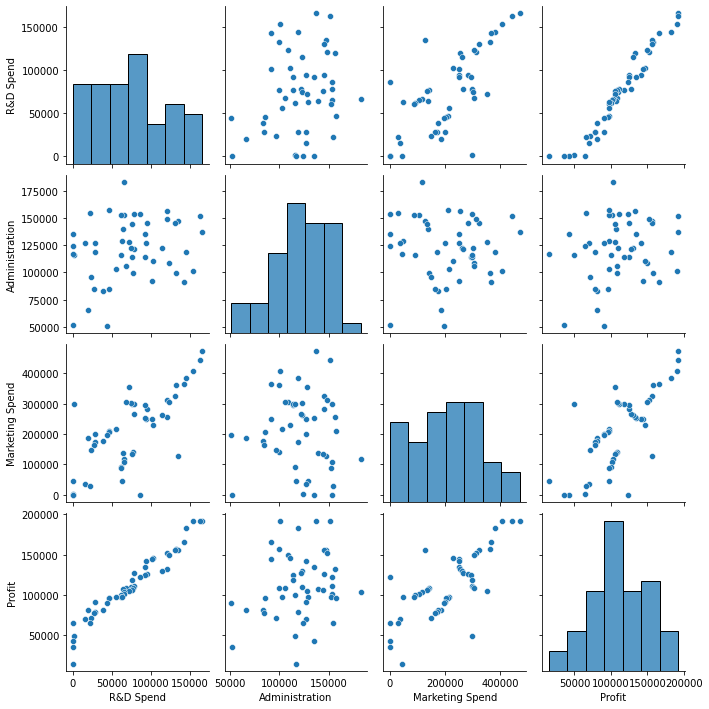

In [2]:
sns.pairplot(data)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


<AxesSubplot:>

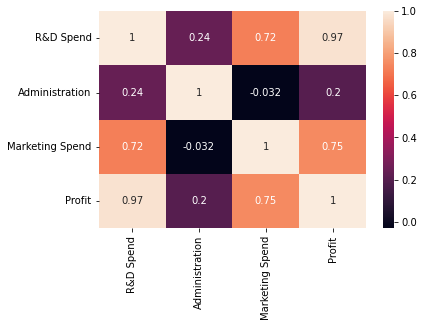

In [3]:
correlation = data.corr()
print(correlation)

sns.heatmap(correlation, annot = True)

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

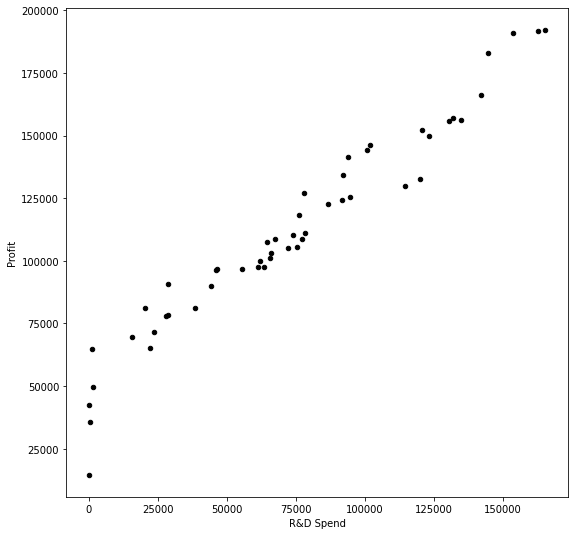

In [4]:
data.plot(kind='scatter', x='R&D Spend', y='Profit', figsize=(9,9), color='black')

Intercept của mô hình :  49032.89914125215
Coefient của mô hình :  [0.85429137]
Độ chính xác của mô hình :  0.9465353160804393


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


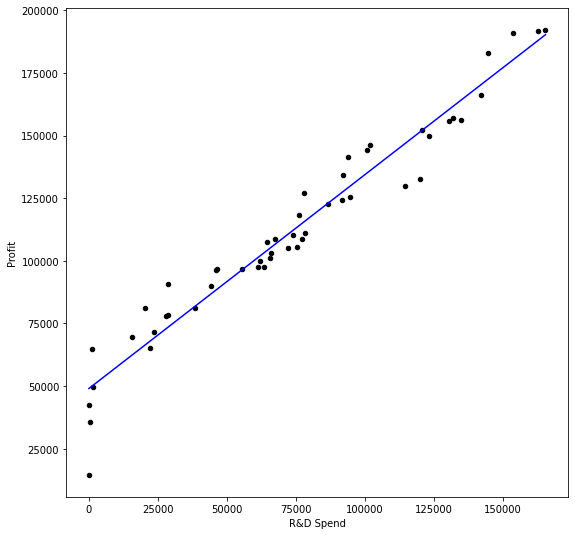

In [5]:
#Hồi quy hàm bậc 1
model = linear_model.LinearRegression()
X=pd.DataFrame(data['R&D Spend'])
y=data['Profit']
#PT hồi quy : y = coef*X + intercept
model.fit(X, y)
print('Intercept của mô hình : ', model.intercept_)
print('Coefient của mô hình : ', model.coef_)
print('Độ chính xác của mô hình : ', model.score(X,y))

range = np.arange(data['R&D Spend'].min(), data['R&D Spend'].max(), 0.1)
predictor = pd.DataFrame(range)
data.plot(kind = 'scatter', x = 'R&D Spend', y = 'Profit', figsize = (9,9), color = 'black')
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'blue')

Intercept của mô hình :  43108.76756818297
Coefient của mô hình :  [ 1.40072682e+00 -8.82403324e-06  3.64774030e-11]
Độ chính xác của mô hình :  0.9540709421464032


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


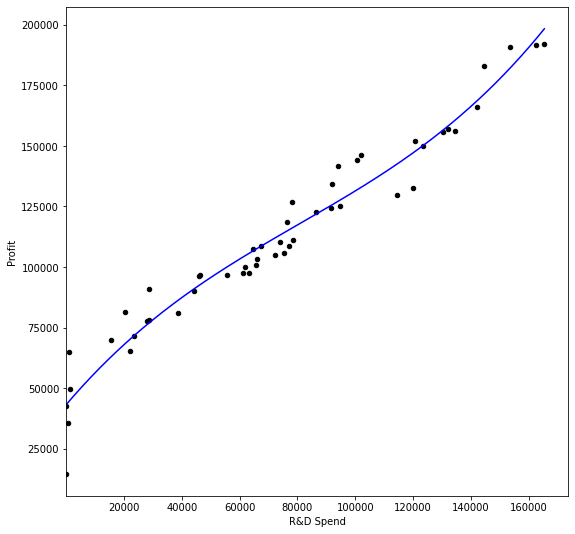

In [6]:
#Hồi quy bậc 3
model = linear_model.LinearRegression()
X=pd.DataFrame([data['R&D Spend'], data['R&D Spend']**2, data['R&D Spend']**3]).T
y=data['Profit']
model.fit(X, y)
print('Intercept của mô hình : ', model.intercept_)
print('Coefient của mô hình : ', model.coef_)
print('Độ chính xác của mô hình : ', model.score(X,y))

range = np.arange(data['R&D Spend'].min(), data['R&D Spend'].max(), 0.1)
data.plot(kind='scatter', x='R&D Spend', y='Profit', figsize=(9,9), color='black', xlim=0.7)
predictor = pd.DataFrame([range, range**2, range**3]).T
y_pred = model.predict(X=predictor)
plt.plot(range, y_pred, color='blue')

Intercept của mô hình :  54454.40996740002
Coefient của mô hình :  [ 6.45872939e-10  2.52519103e-05 -2.52720474e-10  8.00998401e-16]
Độ chính xác của mô hình :  0.9338075472558462


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


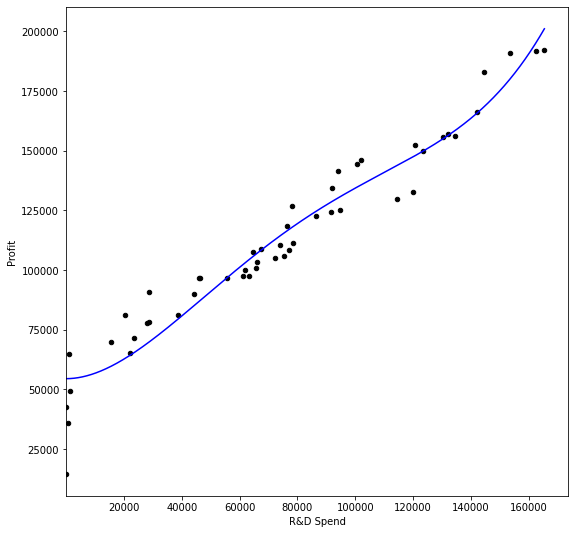

In [7]:
#Hồi quy bậc 4
model = linear_model.LinearRegression()
X=pd.DataFrame([data['R&D Spend'], data['R&D Spend']**2, data['R&D Spend']**3, data['R&D Spend']**4]).T
y=data['Profit']

model.fit(X, y)
print('Intercept của mô hình : ', model.intercept_)
print('Coefient của mô hình : ', model.coef_)
print('Độ chính xác của mô hình : ', model.score(X,y))

range = np.arange(data['R&D Spend'].min(), data['R&D Spend'].max(), 0.1)
data.plot(kind='scatter', x='R&D Spend', y='Profit', figsize=(9,9), color='black', xlim=0.7)
predictor = pd.DataFrame([range, range**2, range**3, range**4]).T
y_pred = model.predict(X=predictor)
plt.plot(range, y_pred, color='blue')